In [8]:
import pandas as pd
import urllib.request
import numpy as np
from IPython.display import display

In [9]:
print('Loading merged data ...')
mutations = pd.read_csv("pancancer_mutations_merged.csv")
print("done.")
print("Mutations count", mutations.Tumor_Sample_Barcode.count())

Loading merged data ...


/Users/tonyd/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (11,13,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


done.
Mutations count 3570876


In [30]:
# Get number of cases per cancer type
mutations.groupby(['cancer_type', 'bcr_patient_barcode']).size().groupby(level=0).max()

cancer_type
ACC      2876
BLCA     5076
BRCA     7586
CESC    20353
CHOL     1285
COAD    13582
DLBC      652
ESCA     3307
GBM     18307
HNSC     4131
KICH     1066
KIRC     1248
KIRP     1548
LGG     15906
LIHC     2072
LUAD     2843
LUSC     4338
MESO      429
OV       2926
PAAD    21673
PCPG       90
PRAD     9612
READ    17069
SARC     3539
SKCM    55283
STAD    14110
TGCT       77
THCA      710
THYM     1098
UCEC    40047
UCS      5148
UVM       596
dtype: int64

max count gene_count    446
dtype: int64 min count gene_count    1
dtype: int64 median gene_count    5.0
dtype: float64


,gene_count
Hugo_Symbol,
ABCA13,76
AHNAK,58
ANK3,52
APOB,57
CACNA1E,63
CDH1,144
CSMD1,75
CSMD2,59
CSMD3,64


,Hugo_Symbol
0,ABCA13
1,AHNAK
2,ANK3
3,APOB
4,CACNA1E


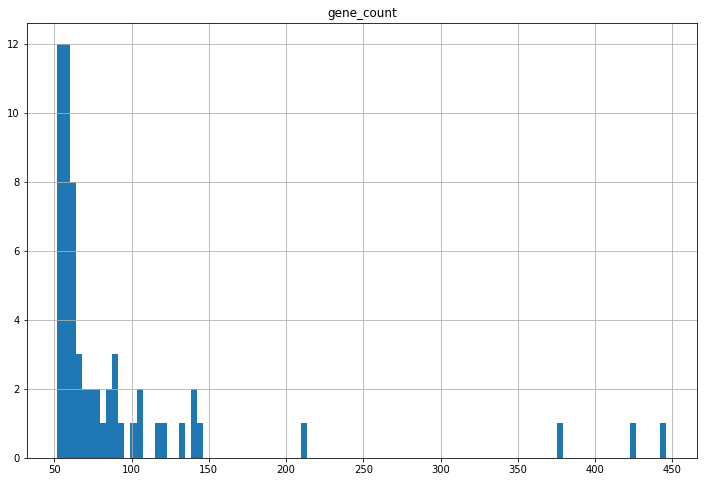

In [79]:
# Get a list of the unique gene names
unique_genes = mutations[mutations.cancer_type == 'BRCA'].groupby('Hugo_Symbol').count()[mutations.columns[0:1]]
unique_genes.columns = ['gene_count']
print('max count', unique_genes.max(), 'min count', unique_genes.min(), 'median', unique_genes.median())
feature_genes = unique_genes[unique_genes.gene_count > 50]
#feature_genes = feature_genes[unique_genes.gene_count < 500]
display(feature_genes)
feature_genes.hist(bins=100, figsize=(12,8))
feature_genes = pd.DataFrame(feature_genes.index)
feature_genes.head()




In [89]:
# We need to get a list of unique genes for every case
cases = list()
grouped = mutations[mutations.cancer_type == 'BRCA'].groupby('bcr_patient_barcode')
i = int(0)

cols = ['case', 'cancer_type', 'gender', 'age_at_diag']
for gene in feature_genes.Hugo_Symbol:
    cols.append(gene)


for name, group in grouped:
    case = list()
    case.append(name)
    for cc in group.cancer_type.head(1):
        case.append(cc)
    for gender in group.gender.head(1):
        case.append(gender)
    for diag_age in group.age_at_initial_pathologic_diagnosis.head(1):
        case.append(diag_age)
    for gene_flag  in feature_genes.Hugo_Symbol.isin(group.Hugo_Symbol.unique()):
        case.append(gene_flag)
    cases.append(case)
 
print(cases[0])
cases_df = pd.DataFrame(cases)
cases_df.columns = cols
display(cases_df)

['TCGA-3C-AAAU', 'BRCA', 'FEMALE', 55, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]


,case,cancer_type,gender,age_at_diag,ABCA13,AHNAK,ANK3,APOB,CACNA1E,CDH1,...,SPTA1,SYNE1,SYNE2,TP53,TTN,UBR4,USH2A,VPS13B,XIRP2,ZFHX4
0,TCGA-3C-AAAU,BRCA,FEMALE,55,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,TCGA-3C-AALI,BRCA,FEMALE,50,False,True,False,True,False,False,...,True,False,False,True,True,False,False,False,False,True
2,TCGA-3C-AALJ,BRCA,FEMALE,62,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,TCGA-3C-AALK,BRCA,FEMALE,52,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,TCGA-4H-AAAK,BRCA,FEMALE,50,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
5,TCGA-5L-AAT0,BRCA,FEMALE,42,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
6,TCGA-5L-AAT1,BRCA,FEMALE,63,True,True,False,False,True,True,...,True,False,True,False,True,False,False,True,True,False
7,TCGA-5T-A9QA,BRCA,FEMALE,52,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,TCGA-A1-A0SB,BRCA,FEMALE,70,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,TCGA-A1-A0SD,BRCA,FEMALE,59,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
